What is the most optimal skill to learn for Data Analysts?

Methodology

1. Group skills to determine nedian salary and likelihood of being in posting
2. Visualize median salary vs percent skill demand
3. (Optional) Determine if certain technologies are more prevelent

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
# Crating a new data frmae for Data Analyst and Job posting Country

df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

# Explode 
df_DA_US_exploded = df_DA_US.explode('job_skills')

df_DA_US_exploded[['salary_year_avg', 'job_skills']].head(5)


,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [10]:
# Group by 'meadian' salary and 'count' skills
df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

# Rename the columns
df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

# Calculating percentage

DA_job_count = len(df_DA_US)

df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100

# Dataframe for 'most demanded skills' 
skill_percent = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_percent]

df_DA_skills_high_demand


,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


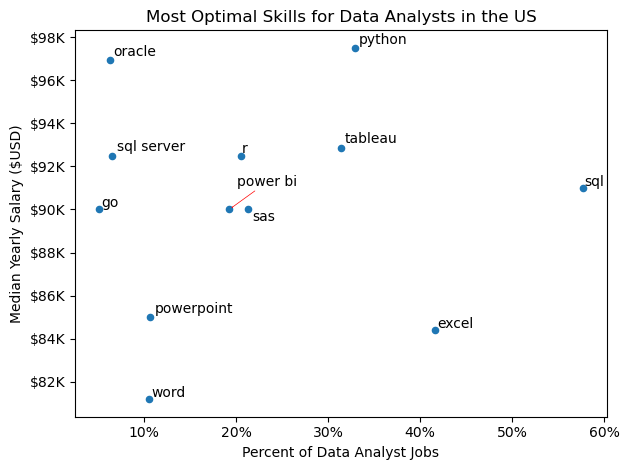

In [17]:
# Plotting

from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

df_DA_skills_high_demand.plot(kind='scatter', x='skill_percent', y='median_salary')

# To add the skills into the 'scatter' plot
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color="r", lw=0.5), expand=(1.05, 1.8))


# Customizing the yaxis values from 10000 to 10K
# fig, ax = plt.subplots()
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Set axis labels, title, and legend
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Most Optimal Skills for Data Analysts in the US')

# Adjust layout and display the plot
plt.tight_layout()    
plt.show()

In [19]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row) # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict: # if key already exists in technology_dict, add value to existing dict
            technology_dict[key] += value
        else:                      # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['microstrategy',
  'excel',
  'word',
  'tableau',
  'spss',
  'msaccess',
  'outlook',
  'alteryx',
  'sas',
  'dax',
  'spreadsheet',
  'nuix',
  'datarobot',
  'powerpoint',
  'cognos',
  'splunk',
  'esquisse',
  'sharepoint',
  'ssrs',
  'powerbi',
  'sap',
  'visio',
  'looker',
  'ssis',
  'power bi',
  'sheets',
  'ms access',
  'qlik'],
 'programming': ['css',
  'visualbasic',
  'bash',
  'f#',
  'typescript',
  'nosql',
  'perl',
  'fortran',
  'dart',
  'objective-c',
  'swift',
  'ocaml',
  'r',
  'python',
  'shell',
  'java',
  'go',
  'cobol',
  'solidity',
  'golang',
  'apl',
  'sas',
  'sass',
  'groovy',
  'haskell',
  'rust',
  'scala',
  'pascal',
  'mongodb',
  'c++',
  'erlang',
  'sql',
  'assembly',
  'lua',
  'lisp',
  't-sql',
  'c#',
  'crystal',
  'mongo',
  'matlab',
  'ruby',
  'elixir',
  'javascript',
  'c',
  'html',
  'vb.net',
  'php',
  'visual basic',
  'delphi',
  'kotlin',
  'no-sql',
  'powershell',
  'clojure',
  'julia',
  '

In [22]:
# Adding the dictionary to the DataFrame
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])  # Adding the key, value to two different columns ('technology', 'skills')

In [23]:
df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,microstrategy
0,analyst_tools,excel
0,analyst_tools,word
0,analyst_tools,tableau
0,analyst_tools,spss
...,...,...
9,sync,ringcentral
9,sync,mattermost
9,sync,webex
9,sync,zoom


In [25]:
# Merging it with the original DataFrame (df_DA_skills_high_demand)
df_plot = df_DA_skills_high_demand.merge(df_technology, left_on='job_skills', right_on='skills')

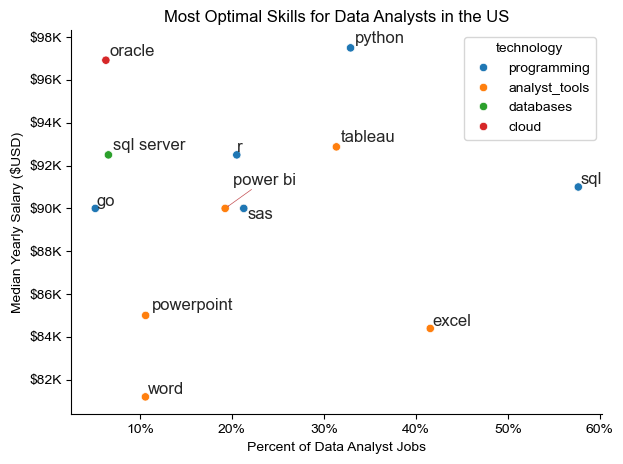

In [30]:
# Plotting

# Plotting

from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

# df_plot.plot(kind='scatter', x='skill_percent', y='median_salary')
sns.scatterplot(
    data=df_plot, 
    x='skill_percent', 
    y='median_salary', 
    hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')

# To add the skills into the 'scatter' plot
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color="r", lw=0.5), expand=(1.05, 1.8))


# Customizing the yaxis values from 10000 to 10K
# fig, ax = plt.subplots()
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Set axis labels, title, and legend
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Most Optimal Skills for Data Analysts in the US')

# Adjust layout and display the plot
plt.tight_layout()    
plt.show()